In [2]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Ellipse
from matplotlib import markers

In [9]:
data = np.load('data/gaussian.npz')
gaussian = data['arr_0']

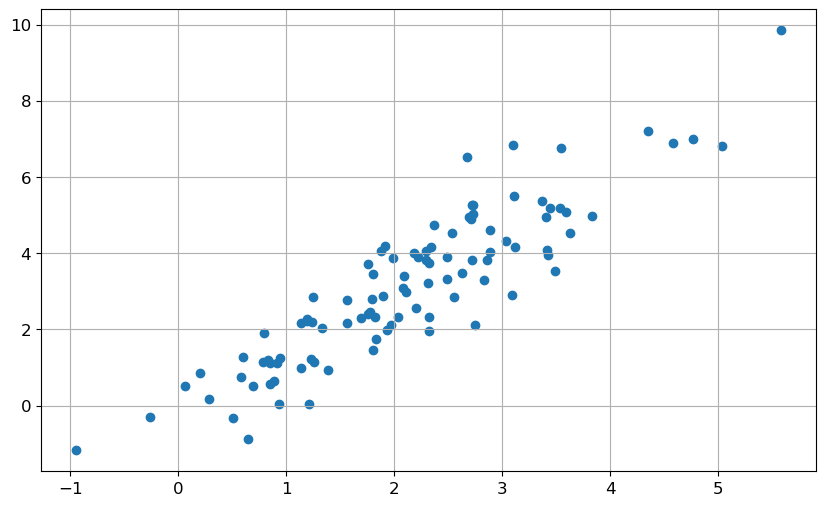

In [12]:
plt.rc('font', size=12)
plt.figure(figsize=(10,6))
plt.scatter(gaussian[:, 0], gaussian[:, 1])
plt.grid()
plt.show()

In [15]:
true_mean = np.mean(gaussian, axis=0)
print(true_mean)

[2.12308534 3.12168402]


In [16]:
true_cov = np.cov(gaussian.T, bias=True)
print(true_cov)

[[1.33765954 2.0820358 ]
 [2.0820358  3.98639368]]


In [ ]:
#Estimating mean and comparing with the built in numpy fuction
mean = np.sum(gaussian, axis=0) / len(gaussian)
print(f'The estimated mean is {mean}')
print(f'The mean calculated using np.mean is {true_mean}')

The estimated mean is [2.12308534 3.12168402]
The mean calculated using np.mean is [2.12308534 3.12168402]
[[ 2.53766714  4.53428727]
 [ 3.83388501  4.98176918]
 [-0.25884686 -0.30158736]
 [ 2.86217332  3.82168409]
 [ 2.31876524  3.74100458]
 [ 0.6923117   0.5185695 ]
 [ 1.56640798  2.77393438]
 [ 2.34262447  4.15424395]
 [ 5.57839694  9.85013372]
 [ 4.76943703  6.98603963]
 [ 0.65011306 -0.8767004 ]
 [ 5.03492347  6.82528002]
 [ 2.72540422  5.26121944]
 [ 1.93694513  1.97690397]
 [ 2.7147429   4.90432482]
 [ 1.79503394  2.79998119]
 [ 1.87585565  4.05799925]
 [ 3.48969761  3.5363572 ]
 [ 3.40903449  4.94234005]
 [ 3.41719241  4.07976375]
 [ 2.67149713  6.52565453]
 [ 0.79251308  1.90343014]
 [ 2.71723865  5.27008274]
 [ 3.63023529  4.52894195]
 [ 2.48889377  3.32750766]
 [ 3.03469301  4.31607408]
 [ 2.72688513  5.04159132]
 [ 1.69655908  2.30419446]
 [ 2.29387147  4.04835993]
 [ 1.2127172   0.04215075]
 [ 2.88839563  4.02615036]
 [ 0.85292989  0.56614799]
 [ 0.93112954  0.03092287]
 [

In [27]:
#Estimate the covariance and compare it with the numpy builtin function
cov = 1 / len(gaussian) * np.matmul((gaussian - mean).T , (gaussian - mean))
print(f'Covariance using generalization is {cov} ')
print(f'Covariance using np.cov is {true_cov}')

Covariance using generalization is [[1.33765954 2.0820358 ]
 [2.0820358  3.98639368]] 
Covariance using np.cov is [[1.33765954 2.0820358 ]
 [2.0820358  3.98639368]]


In [29]:
def plot_guassian(ax, mean, cov, color='red', size=3):
    eig_w, eig_v = np.linalg.eig(cov)
    eig_v_0 = eig_v[0]
    #arccos of first eigen vectors x coordinate will give us the angle
    angle = np.arccos(eig_v_0[0])
    # however, this only works for angles in [0, pi]
    # for angles in [pi, 2*pi] we need to consider the
    # y coordinate, too
    if eig_v_0[1] > 0:
        angle = 2 * np.pi - angle
    angle = np.rad2deg(angle)

    for i in range(size):
        ell = Ellipse(xy=[mean[0], mean[1]], width=np.sqrt(eig_w[0] * 2 * (i + 1)), height=np.sqrt(eig_w[1] * 2 * (i + 1)),
                      angle = angle, edgecolor = color, lw = 2, facecolor = 'none')
        ax.add_artist(ell)
    print(true_mean)
    ax.plot(mean[0], mean[1], 'x', c = color, ms = 20)



In [32]:
def plot_with_eig(samples, mean, cov):
    fig, ax = plt.subplots(figsize = (10,6))
    plot_guassian(ax, mean, cov)
    plt.scatter(samples[:, 0], samples[: , 1])
    plt.grid()
    plt.show()


[2.12308534 3.12168402]


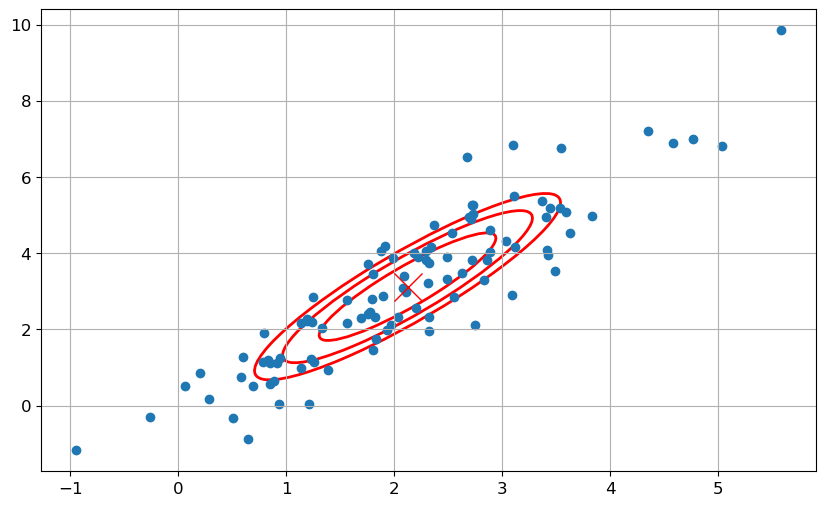

In [33]:
plot_with_eig(gaussian, true_mean, true_cov)